In [2]:
pip install pymoo

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.visualization.scatter import Scatter

#   minimmize  
### $f_1=x^2$ 
### $f_2=(x-2)^2$
### $ 0 \leq x \leq 2$

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |    100 |             - |             -
     2 |      200 |    100 |  0.0206839051 |         nadir
     3 |      300 |    100 |  0.0028987880 |             f
     4 |      400 |    100 |  0.0025526846 |             f
     5 |      500 |    100 |  0.0026036495 |             f
     6 |      600 |    100 |  0.0019319268 |             f
     7 |      700 |    100 |  0.0037946172 |             f
     8 |      800 |    100 |  0.0023950696 |             f
     9 |      900 |    100 |  0.0034652650 |             f
    10 |     1000 |    100 |  0.0028361840 |             f
    11 |     1100 |    100 |  0.0022917227 |             f
    12 |     1200 |    100 |  0.0044566822 |             f
    13 |     1300 |    100 |  0.0023152762 |             f
    14 |     1400 |    100 |  0.0035716100 |             f
    15 |     1500 |    100 |  0.0026830057 |             f
    16 |     1600 |    100 |  0.0019874537 |            

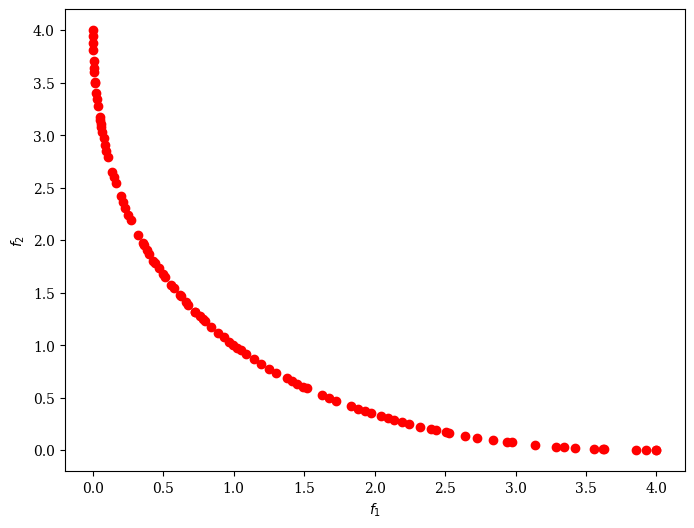

In [28]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=1,  # no. of varaibles in the problem = 1
                         n_obj=2, # no. of objective funcions = 2
                         n_constr=0, # no. of inequality constraints
                         xl=np.array([0]), # upper bounds on x
                         xu=np.array([2]), # lower bounds on x
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = x[0]**2   # minimize
        f2 =  (x[0]-2)**2  # minimize

        out["F"] = [f1, f2]

problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=True,
               seed=1)

print(res.F)
# Extract data from the result and plot the Pareto front
x = res.X[:,0].reshape(len(res.X),1)
plot = Scatter()
plot.add(res.F, color="red")
plot.show()
# f1 = x**2   
# f2 =  (x-2)**2 
# F = np.hstack([f1,f2])
# plot = Scatter()
# plot.add(F, color="red")
# plot.show()

# minimize
### $f_1$ = total surface area of cone = $\pi x_1(x_1+s)$
### $f_2$ = lateral surface area of cone = $ \pi x_1 s$
### s = slant height = $\sqrt{x_1^2 + x_2^2}$
# subject to
### volume of cone = $\frac{\pi x_1^2x_2}{3}$ = 100 $m^3$
### $ 0 \leq x_1 \leq 10 $ m
### $ 0 \leq x_2 \leq  10 $ m

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      2 |             - |             -
     2 |      200 |      4 |  0.2736634286 |             f
     3 |      300 |      5 |  0.0591492850 |             f
     4 |      400 |      5 |  0.0721998956 |         ideal
     5 |      500 |      4 |  0.1259280012 |         ideal
     6 |      600 |      5 |  0.0271083316 |         ideal
     7 |      700 |      5 |  0.0680098386 |         ideal
     8 |      800 |      5 |  0.1048640915 |         ideal
     9 |      900 |      6 |  0.0477061547 |             f
    10 |     1000 |      6 |  0.000000E+00 |             f
    11 |     1100 |      6 |  0.000000E+00 |             f
    12 |     1200 |      7 |  0.0247044452 |             f
    13 |     1300 |      7 |  0.000000E+00 |             f
    14 |     1400 |      9 |  0.0079170617 |             f
    15 |     1500 |      9 |  0.000000E+00 |             f
    16 |     1600 |      9 |  0.0001321296 |            

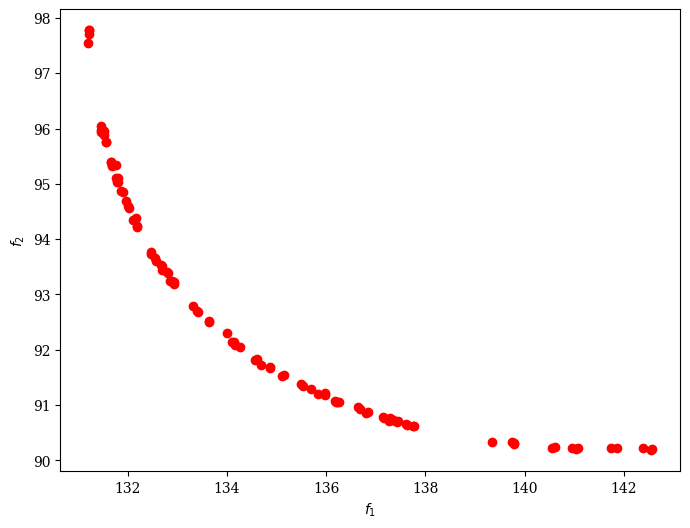

In [16]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,  # no. of varaibles in the problem = 2
                         n_obj=2, # no. of objective funcions = 2
                         n_constr=0, # no. of inequality constraints
                         xl=np.array([0, 0]), # upper bounds on x
                         xu=np.array([10, 10]), # lower bounds on x
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
        
        # defining constraint
        v = 3.14*x[0]**2*x[1]/3
        w=0
        if v<100:
            w=100000
        
        # defining objective functions
        s = (x[0]**2 + x[1]**2)**0.5
        f1 = 3.14*x[0]*(x[0]+s)+ w*(1-v/100)**2   # minimize total surface area subjected to vol=100
        f2 =  3.14*x[0]*s + w*(1-v/100)**2    # minimize lateral surface area subjected to vol=100

        out["F"] = [f1, f2]

problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 200),
               verbose=True,
               seed=1)

# Extract data from the result and plot the Pareto front
x1 = res.X[:,0].reshape(len(res.X),1)
x2 = res.X[:,1].reshape(len(res.X),1)
s = (x1**2 + x2**2)**0.5
f1 = 3.14*np.multiply(x1,(x1+s)) # elementwise multiplication using np.multiply
f2 = 3.14*np.multiply(x1,s)      # elementwise multiplication using np.multiply
F = np.hstack([f1,f2])
plot = Scatter()
plot.add(F, color="red")
plot.show()

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      4 |             - |             -
     2 |      200 |      4 |  0.0508665223 |         ideal
     3 |      300 |      5 |  0.0660270313 |             f
     4 |      400 |      6 |  0.0086718788 |             f
     5 |      500 |     10 |  0.0424310871 |         ideal
     6 |      600 |     13 |  0.0041287828 |         ideal
     7 |      700 |     14 |  0.0456553625 |         ideal
     8 |      800 |     16 |  0.0118016650 |             f
     9 |      900 |     19 |  0.0051811886 |         ideal
    10 |     1000 |     23 |  0.0088897180 |         nadir
    11 |     1100 |     24 |  0.0332754465 |         ideal
    12 |     1200 |     26 |  0.0037637751 |         ideal
    13 |     1300 |     28 |  0.0045850940 |             f
    14 |     1400 |     26 |  0.0046152559 |             f
    15 |     1500 |     27 |  0.0016261899 |             f
    16 |     1600 |     30 |  0.0088478211 |         ide

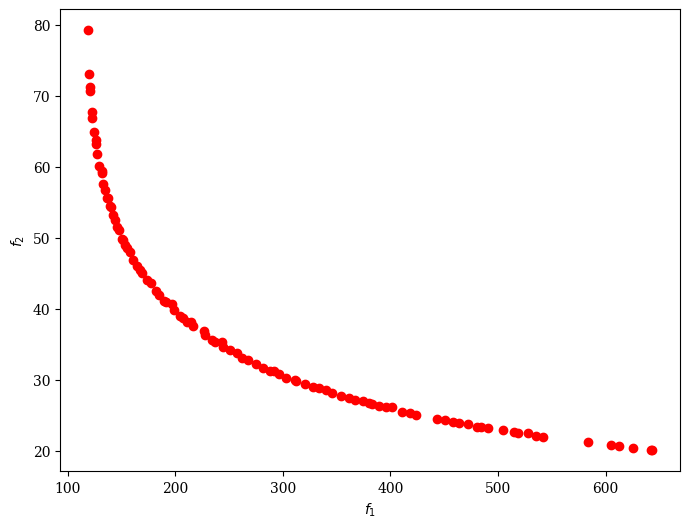

In [17]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,  # no. of varaibles in the problem = 2
                         n_obj=2, # no. of objective funcions = 2
                         n_constr=0, # no. of inequality constraints
                         xl=np.array([0, 0]), # upper bounds on x
                         xu=np.array([10, 10]), # lower bounds on x
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
        
        # defining constraint
        v = 3.14*x[0]**2*x[1]
        w=0
        if v<100:
            w=100000
        
        # defining objective functions
        
        f1 = 2*3.14*x[0]*(x[0]+x[1])+ w*(1-v/100)**2   # minimize total surface area subjected to vol=100
        f2 = 2*3.14*x[0]*x[1] + w*(1-v/100)**2    # minimize lateral surface area subjected to vol=100

        out["F"] = [f1, f2]

problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 200),
               verbose=True,
               seed=1)

# Extract data from the result and plot the Pareto front
x1 = res.X[:,0].reshape(len(res.X),1)
x2 = res.X[:,1].reshape(len(res.X),1)

f1 = 2*3.14*np.multiply(x1,(x1+x2)) # elementwise multiplication using np.multiply
f2 = 2*3.14*np.multiply(x1,x2)      # elementwise multiplication using np.multiply
F = np.hstack([f1,f2])
plot = Scatter()
plot.add(F, color="red")
plot.show()

# maximize return 
# minimise risk

## Data

In [18]:
tbills = np.array([1.1122, 1.143,1.1101,1.0845,1.0961,1.0749,1.0604,1.0572,1.0645,1.0811,1.0755,1.0561,1.0341,1.0298,1.0399,1.0552,1.0502,1.0505,1.0473,1.0451,1.0576,1.0367,1.0166,1.0103,1.0123,1.0301,1.0468,1.0464,1.0159,1.0014,1.0013,1.0003])
tbonds = np.array([0.9701,1.082,1.3281,1.032,1.1373,1.2571,1.2428,0.9504,1.0822,1.1769,1.0624,1.15,1.0936,1.1421,0.9196,1.2348,1.0143,1.0994,1.1492,0.9175,1.1666,1.0557,1.1512,1.0038,1.0449,1.0287,1.0196,1.1021,1.201,0.8888,1.0846,1.1604])
nasdaq = np.array([1.3388,0.9679,1.1867,1.1987,0.8878,1.3136,1.0736,0.9474,1.1541,1.1926,0.822,1.5684,1.1545,1.1475,0.968,1.3992,1.2271,1.2164,1.3963,1.8559,0.6071,0.7895,0.6847,1.5001,1.0859,1.0137,1.0952,1.0981,0.5946,1.4389,1.1691,0.982])
dowjones = np.array([1.1493,0.9077,1.1961,1.2027,0.9626,1.2766,1.2258,1.0226,1.1185,1.2696,0.9566,1.2032,1.0417,1.1372,1.0214,1.3345,1.2601,1.2264,1.161,1.2522,0.9382,0.929,0.8324,1.2532,1.0315,0.9939,1.1629,1.0643,0.6616,1.1882,1.1102,1.0553])
sp500 = np.array([1.2577,0.9027,1.1476,1.1727,1.014,1.2633,1.1462,1.0203,1.124,1.2725,0.9344,1.2631,1.0446,1.0706,0.9846,1.3411,1.2026,1.3101,1.2667,1.1953,0.8986,0.8696,0.7663,1.2638,1.0899,1.03,1.1362,1.0353,0.6151,1.2345,1.1278,1])
gold = np.array([1.208,0.746,1.083,0.876,0.822,1.002,1.22,1.243,0.861,0.978,0.924,0.955,0.927,1.145,0.989,1.021,0.952,0.782,1.01,0.968,0.972,1.007,1.256,1.199,1.046,1.178,1.232,1.319,1.043,1.25,1.306,1.078])
Year = np.arange(1980,2012)       
data = np.hstack((Year.reshape(32,1), tbills.reshape(32,1), tbonds.reshape(32,1), nasdaq.reshape(32,1), dowjones.reshape(32,1), sp500.reshape(32,1), gold.reshape(32,1) ))
import pandas as pd
pd.DataFrame(data,columns=['Year', 'T.Bills', 'T.Bonds', 'NASDAQ', 'DowJones', 'S&P500', 'Gold'])


,Year,T.Bills,T.Bonds,NASDAQ,DowJones,S&P500,Gold
0,1980.0,1.1122,0.9701,1.3388,1.1493,1.2577,1.208
1,1981.0,1.1430,1.0820,0.9679,0.9077,0.9027,0.746
2,1982.0,1.1101,1.3281,1.1867,1.1961,1.1476,1.083
3,1983.0,1.0845,1.0320,1.1987,1.2027,1.1727,0.876
4,1984.0,1.0961,1.1373,0.8878,0.9626,1.0140,0.822
5,1985.0,1.0749,1.2571,1.3136,1.2766,1.2633,1.002
6,1986.0,1.0604,1.2428,1.0736,1.2258,1.1462,1.220
7,1987.0,1.0572,0.9504,0.9474,1.0226,1.0203,1.243
8,1988.0,1.0645,1.0822,1.1541,1.1185,1.1240,0.861
9,1989.0,1.0811,1.1769,1.1926,1.2696,1.2725,0.978


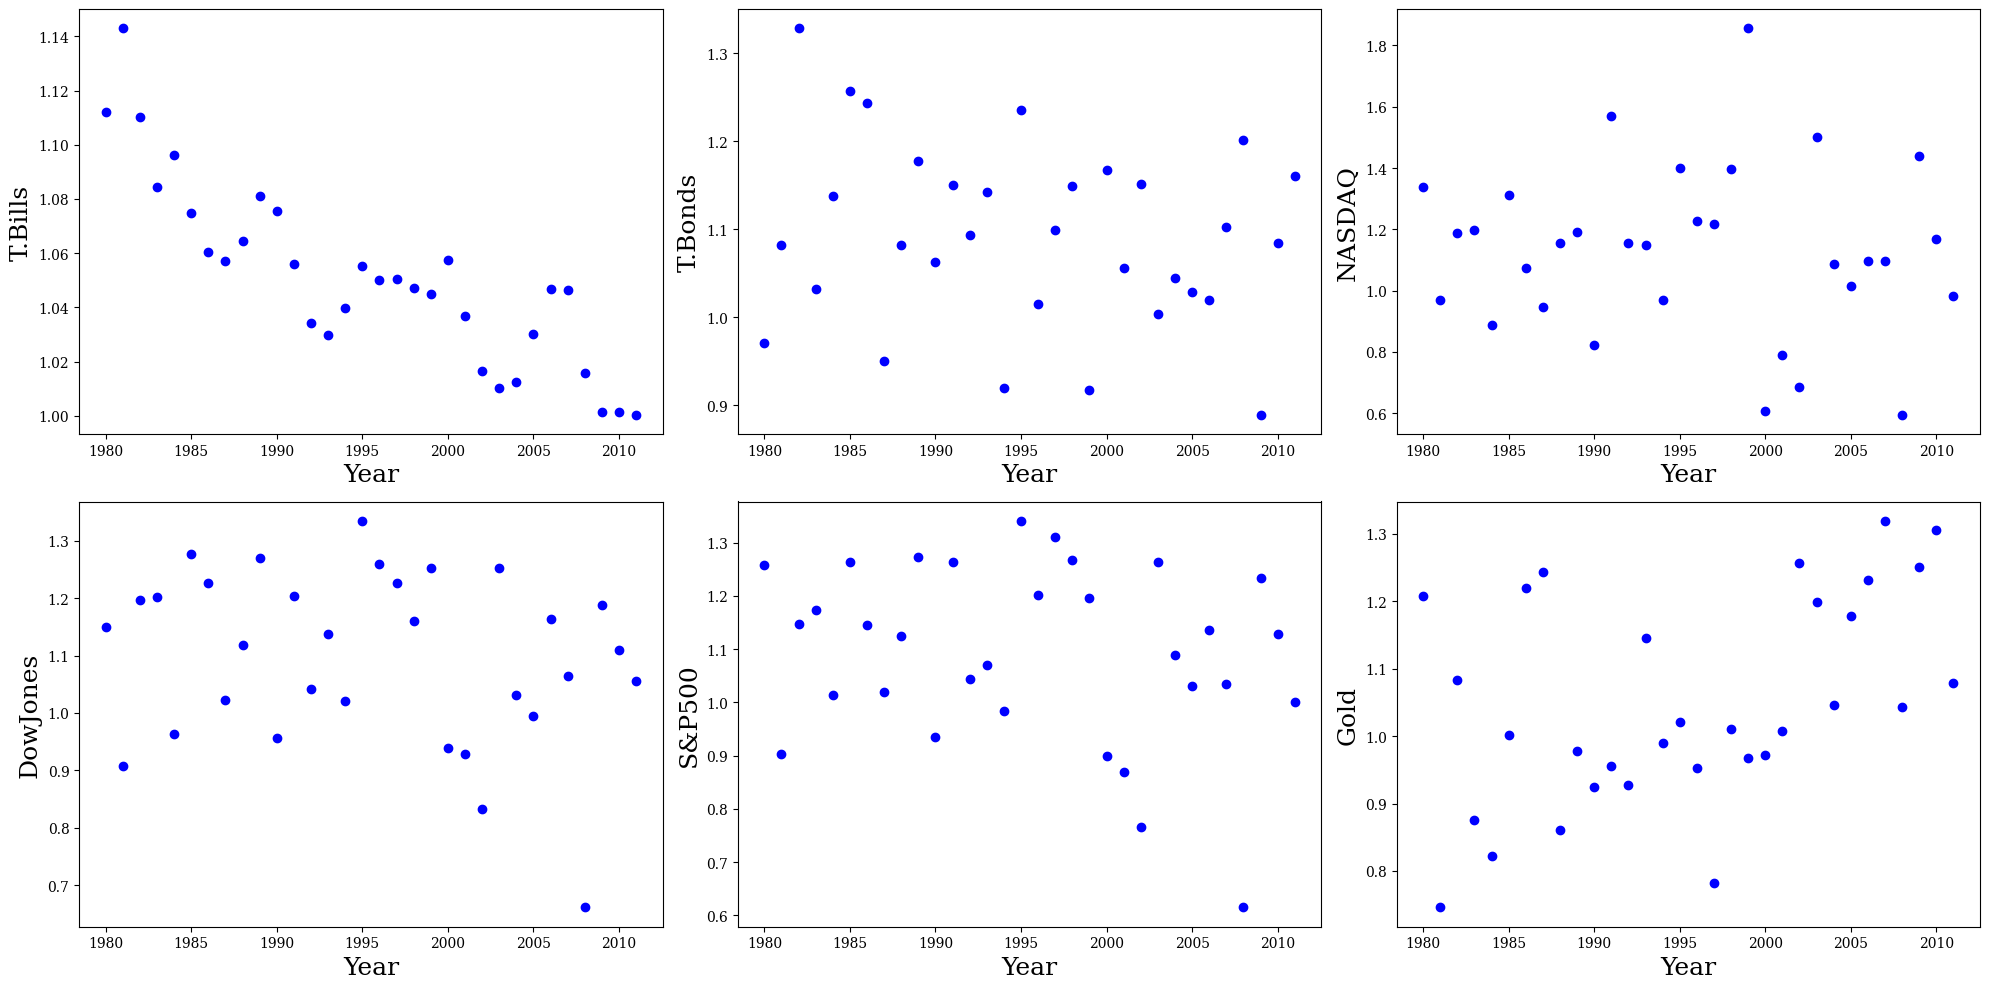

In [19]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# T.Bills
axs[0, 0].scatter(Year, tbills, color='b')
axs[0, 0].set_xlabel("Year", fontsize=18)
axs[0, 0].set_ylabel("T.Bills", fontsize=18)

# T.Bonds
axs[0, 1].scatter(Year, tbonds, color='b')
axs[0, 1].set_xlabel("Year", fontsize=18)
axs[0, 1].set_ylabel("T.Bonds", fontsize=18)

# NASDAQ
axs[0, 2].scatter(Year, nasdaq, color='b')
axs[0, 2].set_xlabel("Year", fontsize=18)
axs[0, 2].set_ylabel("NASDAQ", fontsize=18)

# DowJones
axs[1, 0].scatter(Year, dowjones, color='b')
axs[1, 0].set_xlabel("Year", fontsize=18)
axs[1, 0].set_ylabel("DowJones", fontsize=18)

# S&P500
axs[1, 1].scatter(Year, sp500, color='b')
axs[1, 1].set_xlabel("Year", fontsize=18)
axs[1, 1].set_ylabel("S&P500", fontsize=18)

# Gold
axs[1, 2].scatter(Year, gold, color='b')
axs[1, 2].set_xlabel("Year", fontsize=18)
axs[1, 2].set_ylabel("Gold", fontsize=18)

# Adjust the space between plots
plt.tight_layout()
plt.show()

n_gen  |  n_eval  | n_nds  |      eps      |   indicator  
     1 |      100 |      1 |             - |             -
     2 |      200 |      1 |  5.288025E+08 |         ideal
     3 |      300 |      1 |  7.019216E+09 |         ideal
     4 |      400 |      1 |  0.000000E+00 |             f
     5 |      500 |      2 |  1.0000000000 |         ideal
     6 |      600 |      4 |  0.0618001254 |         ideal
     7 |      700 |      5 |  0.0013898904 |             f
     8 |      800 |      7 |  0.0479992777 |             f
     9 |      900 |      9 |  0.0034696668 |             f
    10 |     1000 |      8 |  0.0382020811 |             f
    11 |     1100 |      8 |  0.0282977469 |             f
    12 |     1200 |     10 |  0.0043506645 |             f
    13 |     1300 |      8 |  0.0372561463 |             f
    14 |     1400 |      8 |  0.1547954093 |         nadir
    15 |     1500 |     11 |  0.0305312245 |             f
    16 |     1600 |     13 |  0.1375003046 |         ide

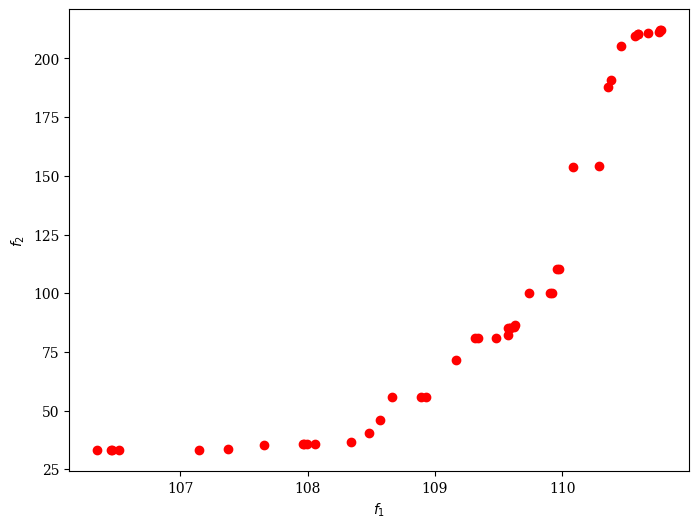

In [20]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=6,  # no. of varaibles in the problem = 6
                         n_obj=2, # no. of objective funcions = 2
                         n_constr=0, # no. of inequality constraints
                         xl=np.array([0, 0, 0, 0, 0, 0]), # upper bounds on x
                         xu=np.array([100, 100, 100, 100, 100, 100]), # lower bounds on x
                         elementwise_evaluation=True)

    def _evaluate(self, x, out, *args, **kwargs):
        tbills = np.array([1.1122, 1.143,1.1101,1.0845,1.0961,1.0749,1.0604,1.0572,1.0645,1.0811,1.0755,1.0561,1.0341,1.0298,1.0399,1.0552,1.0502,1.0505,1.0473,1.0451,1.0576,1.0367,1.0166,1.0103,1.0123,1.0301,1.0468,1.0464,1.0159,1.0014,1.0013,1.0003])
        tbonds = np.array([0.9701,1.082,1.3281,1.032,1.1373,1.2571,1.2428,0.9504,1.0822,1.1769,1.0624,1.15,1.0936,1.1421,0.9196,1.2348,1.0143,1.0994,1.1492,0.9175,1.1666,1.0557,1.1512,1.0038,1.0449,1.0287,1.0196,1.1021,1.201,0.8888,1.0846,1.1604])
        nasdaq = np.array([1.3388,0.9679,1.1867,1.1987,0.8878,1.3136,1.0736,0.9474,1.1541,1.1926,0.822,1.5684,1.1545,1.1475,0.968,1.3992,1.2271,1.2164,1.3963,1.8559,0.6071,0.7895,0.6847,1.5001,1.0859,1.0137,1.0952,1.0981,0.5946,1.4389,1.1691,0.982])
        dowjones = np.array([1.1493,0.9077,1.1961,1.2027,0.9626,1.2766,1.2258,1.0226,1.1185,1.2696,0.9566,1.2032,1.0417,1.1372,1.0214,1.3345,1.2601,1.2264,1.161,1.2522,0.9382,0.929,0.8324,1.2532,1.0315,0.9939,1.1629,1.0643,0.6616,1.1882,1.1102,1.0553])
        sp500 = np.array([1.2577,0.9027,1.1476,1.1727,1.014,1.2633,1.1462,1.0203,1.124,1.2725,0.9344,1.2631,1.0446,1.0706,0.9846,1.3411,1.2026,1.3101,1.2667,1.1953,0.8986,0.8696,0.7663,1.2638,1.0899,1.03,1.1362,1.0353,0.6151,1.2345,1.1278,1])
        gold = np.array([1.208,0.746,1.083,0.876,0.822,1.002,1.22,1.243,0.861,0.978,0.924,0.955,0.927,1.145,0.989,1.021,0.952,0.782,1.01,0.968,0.972,1.007,1.256,1.199,1.046,1.178,1.232,1.319,1.043,1.25,1.306,1.078])
        data = np.hstack(( tbills.reshape(32,1), tbonds.reshape(32,1), nasdaq.reshape(32,1), dowjones.reshape(32,1), sp500.reshape(32,1), gold.reshape(32,1) ))
        meanReturn = np.average(data, axis=0)
        covariants = np.cov(data.transpose())
        
        w=0
        g = np.sum(x)
        if g>101.00:
            w=1000000
        if g<99.00:
            w=1000000
        
        
        f1 = -np.dot(x,meanReturn) + w*(1-g)**2  # maximize the return
        f2 = np.dot(x, np.dot(covariants,x.transpose())) +w*(1-g)**2 # minimize the risk

        out["F"] = [f1, f2]

problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=True,
               seed=1)

# Extract data from the result and plot the Pareto front
# given data 
data = np.hstack((tbills.reshape(32,1), tbonds.reshape(32,1), nasdaq.reshape(32,1), dowjones.reshape(32,1), sp500.reshape(32,1), gold.reshape(32,1) ))
meanReturn = np.average(data, axis=0)
covariants = np.cov(data.transpose())

f1_store = np.array([]) # empty initialization 
f2_store = np.array([]) # empty initialization 

# for loop to compute and store the values of f1 & f2
for i in range(len(res.X)):
    X = res.X[i,:]
    f1 = np.dot(X,meanReturn)   # return
    f2 = np.dot(X, np.dot(covariants,X.transpose())) # risk
    f1_store = np.append(f1_store, f1)         # stroring values
    f2_store = np.append(f2_store, f2)         # stroring values
F = np.hstack([f1_store.reshape(len(res.X),1), f2_store.reshape(len(res.X),1)])

plot = Scatter()
plot.add(F, color="red")
plot.show()

In [21]:
res.X,res.F

(array([[1.05927920e+01, 7.75788238e+00, 7.26434045e+00, 2.92667817e+01,
         4.57984594e+01, 3.11314758e-01],
        [3.69913179e+01, 2.19800424e+01, 4.06891623e+00, 6.74642162e+00,
         2.98710946e+01, 1.29587473e+00],
        [2.45077910e+01, 2.01755280e+01, 3.01925300e+00, 3.31942595e+01,
         1.96685270e+01, 4.26947551e-01],
        [1.74390556e+01, 2.25963986e+01, 3.22841781e+00, 3.06515454e+01,
         2.65097638e+01, 5.73443384e-01],
        [4.56741986e+00, 1.19076543e+01, 1.31391230e+01, 2.51881359e+01,
         4.57874073e+01, 2.16230433e-01],
        [3.69913179e+01, 2.19800424e+01, 4.06891623e+00, 7.20316609e+00,
         2.93300969e+01, 1.34604791e+00],
        [4.56741986e+00, 1.19076543e+01, 1.31402765e+01, 2.51881359e+01,
         4.57874073e+01, 2.16230433e-01],
        [2.45406066e+01, 2.04675660e+01, 3.16086385e+00, 3.32078569e+01,
         1.92618460e+01, 3.18161983e-01],
        [2.56712346e+01, 2.04447185e+01, 3.22995461e+00, 3.14770036e+01,
       

In [22]:
print('x values',res.X[0],'F values',res.F[0])

x values [10.59279199  7.75788238  7.26434045 29.26678175 45.79845936  0.31131476] F values [-110.36433883  187.84397465]


In [23]:
print('x values',res.X[41],'F values',res.F[41])

x values [24.51051307 20.47257166  3.04511195 32.33452677 19.26184595  1.36299391] F values [-109.57492704   82.15424197]
